In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import glob
from plots import loadModel, getMetric
from scipy.stats import wasserstein_distance

setGPU: Setting GPU to: 0


In [225]:
from scipy.special import rel_entr

In [19]:
import scipy as sp

In [13]:
def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    a = a/np.sum(a)
    b = b/np.sum(b)
    
    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

In [20]:
def jsd(p, q, base=np.e):
    '''
        Implementation of pairwise `jsd` based on  
        https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    '''
    ## convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    ## normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [3]:
f = h5py.File('/mnt/ceph/users/vbarinpa/single_particle/all_noPU.h5', 'r')
X = np.asarray(f['image'])
np.random.shuffle(X)

In [4]:
X.shape

(155145, 16, 16, 55)

# Single weight

In [5]:
gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'
g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_weights_epoch_1975_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.h5'

g = loadModel(gen_model2)

g.load_weights(g_weight2)

latent_space=100
n_samples = 2000
noise = np.random.normal(0, 1, (n_samples, latent_space))
generated_images = g.predict(noise)

Using TensorFlow backend.


In [6]:
gen_im_x = np.sum(generated_images, axis=(2, 3))
gen_im_x = np.mean(gen_im_x, axis=0)

real_img_x = np.sum(X[0:n_samples], axis=(2, 3))
real_img_x = np.mean(real_img_x, axis=0)

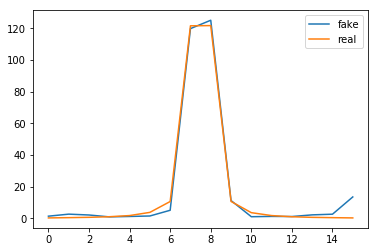

In [10]:
plt.plot(np.arange(16), gen_im_x, label='fake')
plt.plot(np.arange(16), real_img_x, label='real')
plt.legend()

In [8]:
wasserstein_distance(real_img_x, gen_im_x)

1.1236434674334448

In [11]:
gen_im_y = np.sum(generated_images, axis=(1, 3))
gen_im_y = np.mean(gen_im_y, axis=0)

real_img_y = np.sum(X[0:n_samples], axis=(1, 3))
real_img_y = np.mean(real_img_y, axis=0)

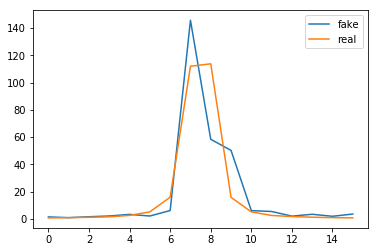

In [12]:
plt.plot(np.arange(16), gen_im_y, label='fake')
plt.plot(np.arange(16), real_img_y, label='real')
plt.legend()

In [69]:
wasserstein_distance(real_img_y, gen_im_y)

8.791885638617124

In [216]:
gen_im_z = np.sum(generated_images, axis=(1, 2))
gen_im_z = np.mean(gen_im_z, axis=0)

real_img_z = np.sum(X[0:n_samples], axis=(1, 2))
real_img_z = np.mean(real_img_z, axis=0)

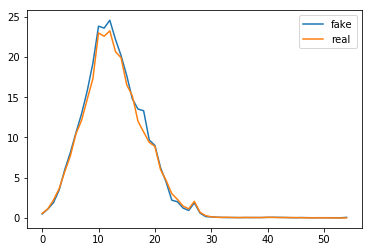

In [14]:
plt.plot(np.arange(55), gen_im_z, label='fake')
plt.plot(np.arange(55), real_img_z, label='real')
plt.legend()

In [15]:
wasserstein_distance(real_img_z, gen_im_z)

0.330160748331634

In [218]:
np.sum(real_img_z)

280.3938008922425

In [220]:
real_img_z_norm = real_img_z/np.sum(real_img_z)

gen_img_z_norm = gen_im_z/np.sum(gen_im_z)

In [224]:
kl_div(real_img_z_norm, gen_img_z_norm)

array([1.42187255e-05, 2.77002869e-06, 1.48744319e-05, 4.04350261e-04,
       8.88553780e-05, 9.68153415e-04, 2.63076070e-05, 6.17682449e-04,
       1.67446573e-04, 6.56135429e-04, 6.59108435e-05, 5.91600197e-05,
       1.04270186e-05, 3.34815514e-05, 4.43522956e-04, 6.29442210e-04,
       4.74794550e-05, 6.52106822e-05, 4.19788992e-05, 1.68647175e-08,
       9.85826678e-06, 1.57404795e-06, 3.18874348e-04, 5.83176965e-04,
       5.00919837e-04, 4.37682589e-04, 1.22368212e-04, 1.35059198e-04,
       1.04566686e-04, 8.67885855e-05, 1.51974206e-03, 9.60529948e-04,
       3.10545443e-04, 3.69894884e-04, 5.03012402e-04, 1.29715209e-04,
       6.38046840e-04, 2.13182443e-04, 2.59690475e-04, 1.05516172e-04,
       3.03941214e-04, 1.08978471e-04, 2.90207049e-04, 5.31317239e-04,
       6.48956693e-05, 6.44686997e-04, 4.46438731e-04, 4.94675544e-04,
       7.02611915e-04, 3.60491179e-04, 3.25245750e-04, 8.79021305e-04,
       9.72382375e-04, 6.09515700e-04, 1.31816999e-03])

In [221]:
np.sum(real_img_z_norm)

0.9999999999999999

In [212]:
max(real_img_z)

23.254945947448256

In [210]:
kl_div(real_img_z, gen_im_z).shape

(55,)

In [227]:
rel_entr(real_img_z, gen_im_z).shape

(55,)

In [229]:
KL(real_img_z, gen_im_z)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


-115.66136244081781

In [241]:
jsd(real_img_z_norm, gen_img_z_norm)

0.005812364252235621

# All

In [5]:
gen_model2 = '../trial32/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'
all_g_weight = '../trial32/weights/generator_weights_*'

g = loadModel(gen_model2)

latent_space=100
n_samples = 2000
noise = np.random.normal(0, 1, (n_samples, latent_space))

Using TensorFlow backend.


In [152]:
wx = []
wy = []
wz = []
epochs = []

for w in glob.glob(all_g_weight):
    epoch = w.split('/')[-1].split('_')[3]
    epoch = int(epoch)
    
    g.load_weights(w)
    generated_images = g.predict(noise)
    
    gen_im_x = np.sum(generated_images, axis=(2, 3))
    gen_im_x = np.mean(gen_im_x, axis=0)

    real_img_x = np.sum(X[0:n_samples], axis=(2, 3))
    real_img_x = np.mean(real_img_x, axis=0)
    
    gen_im_y = np.sum(generated_images, axis=(1, 3))
    gen_im_y = np.mean(gen_im_y, axis=0)

    real_img_y = np.sum(X[0:n_samples], axis=(1, 3))
    real_img_y = np.mean(real_img_y, axis=0)
    
    gen_im_z = np.sum(generated_images, axis=(1, 2))
    gen_im_z = np.mean(gen_im_z, axis=0)

    real_img_z = np.sum(X[0:n_samples], axis=(1, 2))
    real_img_z = np.mean(real_img_z, axis=0)
    
    wx.append(wasserstein_distance(real_img_x, gen_im_x))
    wy.append(wasserstein_distance(real_img_y, gen_im_y))
    wz.append(wasserstein_distance(real_img_z, gen_im_z))
    epochs.append(epoch)

epoch_w = np.array([np.asarray(epochs), np.asarray(wx), np.asarray(wy), np.asarray(wz)])
epoch_w_sorted = (epoch_w.T)[np.argsort(epoch_w[0])]

In [156]:
epoch_w_sorted.shape

(80, 4)

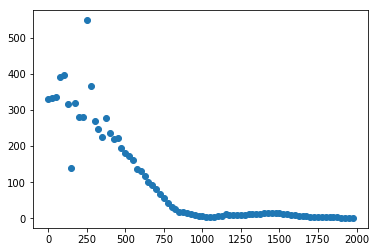

In [157]:
plt.scatter(epoch_w_sorted[:, 0], epoch_w_sorted[:, 1])

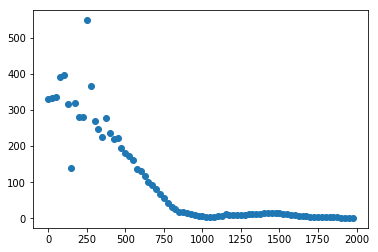

In [112]:
plt.scatter(epoch_w_sorted[:, 0], epoch_w_sorted[:, 1])

plt.scatter(epoch_w_sorted[:, 0], epoch_w_sorted[:, 2])

plt.scatter(epoch_w_sorted[:, 0], epoch_w_sorted[:, 3])

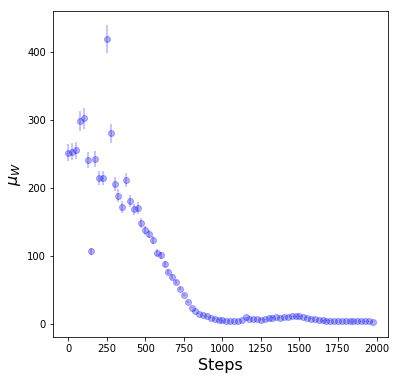

In [189]:
#plt.scatter(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1))
plt.figure(figsize=(6, 6))
plt.errorbar(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1), yerr=np.std(epoch_w_sorted[:, [1, 2, 3]], axis=1)/np.sqrt(len(epoch_w_sorted[:, 1])), color='blue', alpha = 0.3, fmt='o')
plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_W$", size=16)

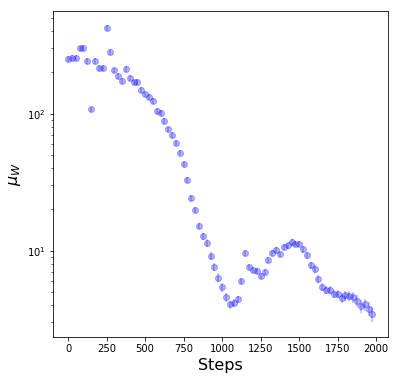

In [188]:
#plt.scatter(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1))
plt.figure(figsize=(6, 6))
plt.errorbar(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1), yerr=np.std(epoch_w_sorted[:, [1, 2, 3]], axis=1)/np.sqrt(len(epoch_w_sorted[:, 1])), color='blue', alpha = 0.3, fmt='o')
plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_W$", size=16)
plt.yscale('log')

(750, 2100)

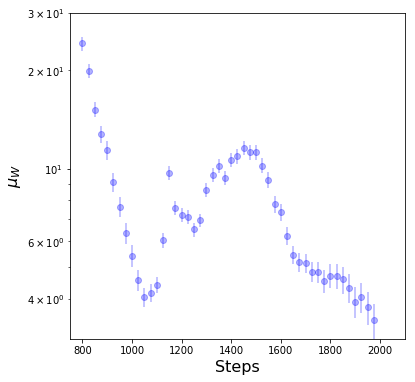

In [193]:
#plt.scatter(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1))
plt.figure(figsize=(6, 6))
plt.errorbar(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1), yerr=np.std(epoch_w_sorted[:, [1, 2, 3]], axis=1)/np.sqrt(len(epoch_w_sorted[:, 1])), color='blue', alpha = 0.3, fmt='o')
plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_W$", size=16)
plt.yscale('log')
plt.ylim(0, 30)
plt.xlim(750, 2100)

(0, 10)

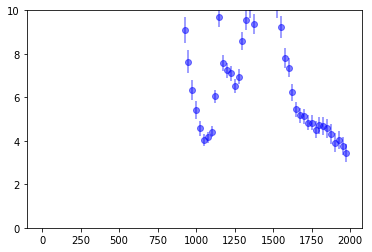

In [182]:
#plt.scatter(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1))
plt.errorbar(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1), yerr=np.std(epoch_w_sorted[:, [1, 2, 3]], axis=1)/np.sqrt(len(epoch_w_sorted[:, 1])), color='blue', alpha = 0.5, fmt='o')
plt.ylim(0, 10)

In [7]:
def wDist(all_g_weight, gen_model):
    wx = []
    wy = []
    wz = []
    epochs = []

    for w in glob.glob(all_g_weight):
        epoch = w.split('/')[-1].split('_')[3]
        epoch = int(epoch)

        g.load_weights(w)
        generated_images = g.predict(noise)

        gen_im_x = np.sum(generated_images, axis=(2, 3))
        gen_im_x = np.mean(gen_im_x, axis=0)

        real_img_x = np.sum(X[0:n_samples], axis=(2, 3))
        real_img_x = np.mean(real_img_x, axis=0)

        gen_im_y = np.sum(generated_images, axis=(1, 3))
        gen_im_y = np.mean(gen_im_y, axis=0)

        real_img_y = np.sum(X[0:n_samples], axis=(1, 3))
        real_img_y = np.mean(real_img_y, axis=0)

        gen_im_z = np.sum(generated_images, axis=(1, 2))
        gen_im_z = np.mean(gen_im_z, axis=0)

        real_img_z = np.sum(X[0:n_samples], axis=(1, 2))
        real_img_z = np.mean(real_img_z, axis=0)
        
        real_img_x_norm = real_img_x/np.sum(real_img_x)
        gen_img_x_norm = gen_im_x/np.sum(gen_im_x)
        
        real_img_y_norm = real_img_y/np.sum(real_img_y)
        gen_img_y_norm = gen_im_y/np.sum(gen_im_y)
        
        real_img_z_norm = real_img_z/np.sum(real_img_z)
        gen_img_z_norm = gen_im_z/np.sum(gen_im_z)

        wx.append(wasserstein_distance(real_img_x_norm, gen_img_x_norm))
        wy.append(wasserstein_distance(real_img_y_norm, gen_img_y_norm))
        wz.append(wasserstein_distance(real_img_z_norm, gen_img_z_norm))
        epochs.append(epoch)
        
    epoch_w = np.array([np.asarray(epochs), np.asarray(wx), np.asarray(wy), np.asarray(wz)])
    epoch_w_sorted = (epoch_w.T)[np.argsort(epoch_w[0])]
    return epoch_w_sorted

In [8]:
w_dist = wDist(all_g_weight, gen_model2)

In [256]:
epoch_w_sorted.shape

(80, 4)

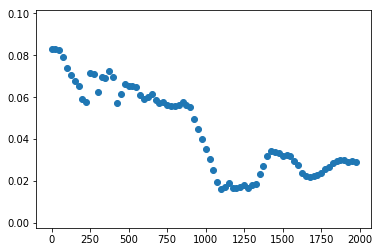

In [257]:
plt.scatter(epoch_w_sorted[:, 0], epoch_w_sorted[:, 2])

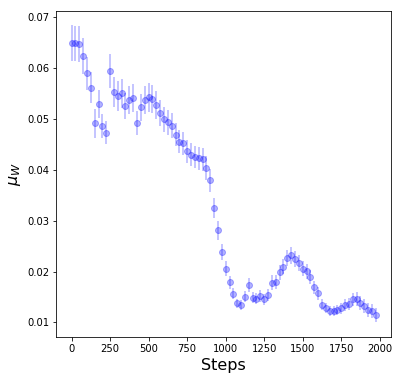

In [258]:
#plt.scatter(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1))
plt.figure(figsize=(6, 6))
plt.errorbar(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1), yerr=np.std(epoch_w_sorted[:, [1, 2, 3]], axis=1)/np.sqrt(len(epoch_w_sorted[:, 1])), color='blue', alpha = 0.3, fmt='o')
plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_W$", size=16)

In [26]:
#from scipy.special import kl_div

In [15]:
def kl(all_g_weight, gen_model):
    wx = []
    wy = []
    wz = []
    epochs = []

    for w in glob.glob(all_g_weight):
        epoch = w.split('/')[-1].split('_')[3]
        epoch = int(epoch)

        g.load_weights(w)
        generated_images = g.predict(noise)

        gen_im_x = np.sum(generated_images, axis=(2, 3))
        gen_im_x = np.mean(gen_im_x, axis=0)

        real_img_x = np.sum(X[0:n_samples], axis=(2, 3))
        real_img_x = np.mean(real_img_x, axis=0)

        gen_im_y = np.sum(generated_images, axis=(1, 3))
        gen_im_y = np.mean(gen_im_y, axis=0)

        real_img_y = np.sum(X[0:n_samples], axis=(1, 3))
        real_img_y = np.mean(real_img_y, axis=0)

        gen_im_z = np.sum(generated_images, axis=(1, 2))
        gen_im_z = np.mean(gen_im_z, axis=0)

        real_img_z = np.sum(X[0:n_samples], axis=(1, 2))
        real_img_z = np.mean(real_img_z, axis=0)
        
        real_img_x_norm = real_img_x/np.sum(real_img_x)
        gen_img_x_norm = gen_im_x/np.sum(gen_im_x)
        
        real_img_y_norm = real_img_y/np.sum(real_img_y)
        gen_img_y_norm = gen_im_y/np.sum(gen_im_y)
        
        real_img_z_norm = real_img_z/np.sum(real_img_z)
        gen_img_z_norm = gen_im_z/np.sum(gen_im_z)

        wx.append(KL(real_img_x_norm, gen_img_x_norm))
        wy.append(KL(real_img_y_norm, gen_img_y_norm))
        wz.append(KL(real_img_z_norm, gen_img_z_norm))
        epochs.append(epoch)
        
    epoch_w = np.array([np.asarray(epochs), np.asarray(wx), np.asarray(wy), np.asarray(wz)])
    epoch_w_sorted = (epoch_w.T)[np.argsort(epoch_w[0])]
    return epoch_w_sorted

In [22]:
kls = kl(all_g_weight, gen_model2)

/mnt/home/vbarinpa/tf9/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/mnt/home/vbarinpa/tf9/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


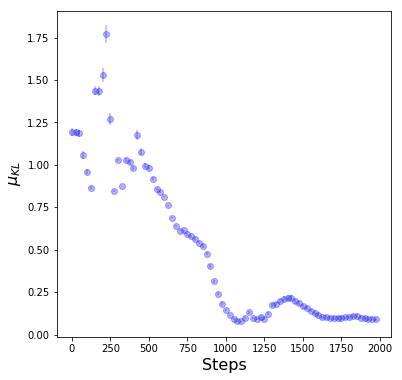

In [262]:
#plt.scatter(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1))
plt.figure(figsize=(6, 6))
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='blue', alpha = 0.3, fmt='o')
plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{KL}$", size=16)
#plt.yscale('log')

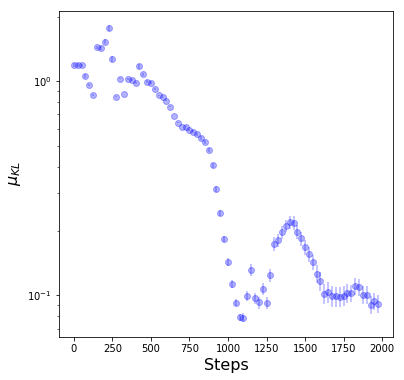

In [263]:
#plt.scatter(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1))
plt.figure(figsize=(6, 6))
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='blue', alpha = 0.3, fmt='o')
plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{KL}$", size=16)
plt.yscale('log')

In [17]:
def js(all_g_weight, gen_model):
    wx = []
    wy = []
    wz = []
    epochs = []

    for w in glob.glob(all_g_weight):
        epoch = w.split('/')[-1].split('_')[3]
        epoch = int(epoch)

        g.load_weights(w)
        generated_images = g.predict(noise)

        gen_im_x = np.sum(generated_images, axis=(2, 3))
        gen_im_x = np.mean(gen_im_x, axis=0)

        real_img_x = np.sum(X[0:n_samples], axis=(2, 3))
        real_img_x = np.mean(real_img_x, axis=0)

        gen_im_y = np.sum(generated_images, axis=(1, 3))
        gen_im_y = np.mean(gen_im_y, axis=0)

        real_img_y = np.sum(X[0:n_samples], axis=(1, 3))
        real_img_y = np.mean(real_img_y, axis=0)

        gen_im_z = np.sum(generated_images, axis=(1, 2))
        gen_im_z = np.mean(gen_im_z, axis=0)

        real_img_z = np.sum(X[0:n_samples], axis=(1, 2))
        real_img_z = np.mean(real_img_z, axis=0)

        real_img_x_norm = real_img_x/np.sum(real_img_x)
        gen_img_x_norm = gen_im_x/np.sum(gen_im_x)
        
        real_img_y_norm = real_img_y/np.sum(real_img_y)
        gen_img_y_norm = gen_im_y/np.sum(gen_im_y)
        
        real_img_z_norm = real_img_z/np.sum(real_img_z)
        gen_img_z_norm = gen_im_z/np.sum(gen_im_z)

        wx.append(jsd(real_img_x_norm, gen_img_x_norm))
        wy.append(jsd(real_img_y_norm, gen_img_y_norm))
        wz.append(jsd(real_img_z_norm, gen_img_z_norm))
        epochs.append(epoch)
        
    epoch_w = np.array([np.asarray(epochs), np.asarray(wx), np.asarray(wy), np.asarray(wz)])
    epoch_w_sorted = (epoch_w.T)[np.argsort(epoch_w[0])]
    return epoch_w_sorted

In [23]:
jss = js(all_g_weight, gen_model2)

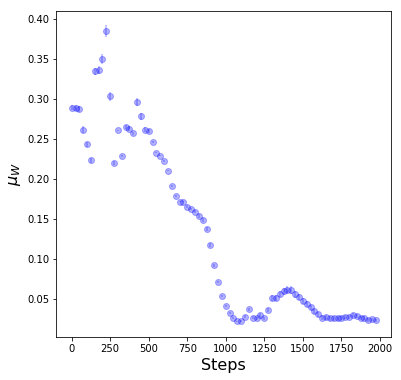

In [261]:
#plt.scatter(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1))
plt.figure(figsize=(6, 6))
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), color='blue', alpha = 0.3, fmt='o')
plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_W$", size=16)
#plt.yscale('log')

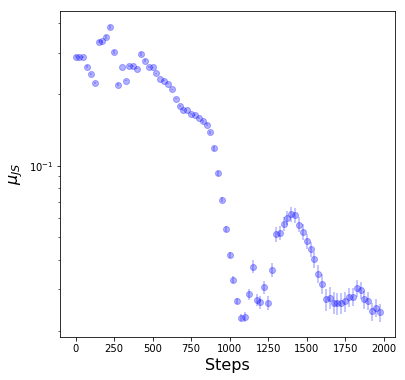

In [260]:
#plt.scatter(epoch_w_sorted[:, 0], np.mean(epoch_w_sorted[:, [1, 2, 3]], axis=1))
plt.figure(figsize=(6, 6))
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), color='blue', alpha = 0.3, fmt='o')
plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{JS}$", size=16)
plt.yscale('log')

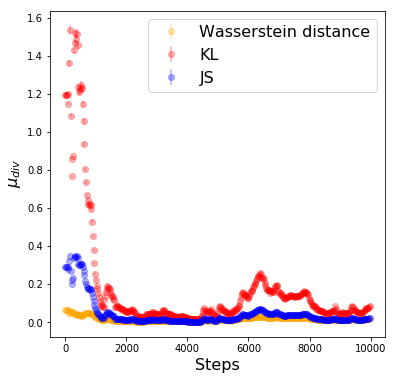

In [28]:
plt.figure(figsize=(6, 6))

plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='Wasserstein distance')
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{div}$", size=16)
plt.legend(prop={'size': 16})
#plt.yscale('log')

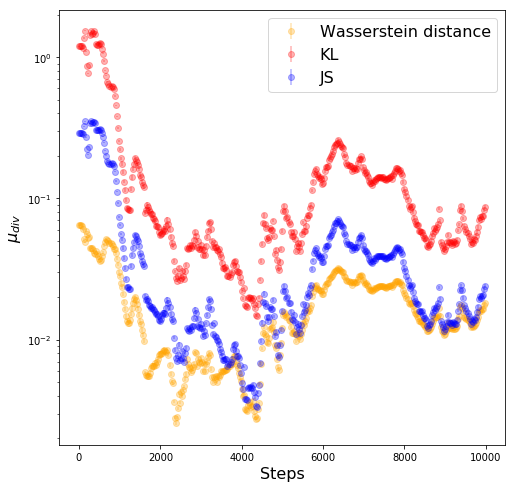

In [29]:
plt.figure(figsize=(8, 8))

plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='Wasserstein distance')
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{div}$", size=16)
plt.legend(prop={'size': 16})
plt.yscale('log')

(1980, 6000)

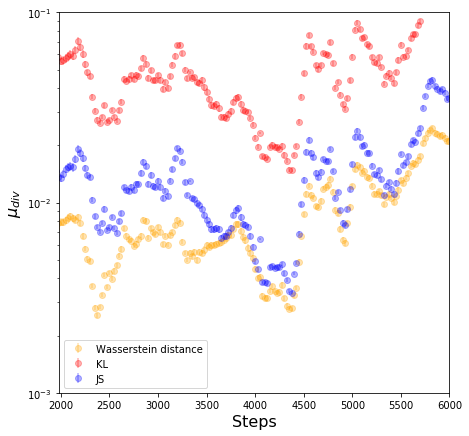

In [31]:
plt.figure(figsize=(7, 7))

plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='Wasserstein distance')
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{div}$", size=16)
plt.legend()
plt.yscale('log')

plt.ylim(0.001, 0.1)
plt.xlim(1980, 6000)

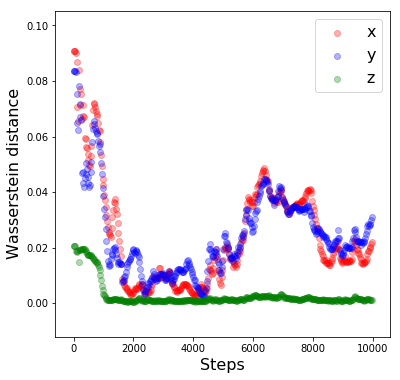

In [11]:
plt.figure(figsize=(6, 6))

plt.scatter(w_dist[:, 0], w_dist[:, 1], color='red', alpha=0.3, label='x')
plt.scatter(w_dist[:, 0], w_dist[:, 2], color='blue', alpha=0.3, label='y')
plt.scatter(w_dist[:, 0], w_dist[:, 3], color='green', alpha=0.3, label='z')

plt.xlabel("Steps", size=16)
plt.ylabel("Wasserstein distance", size=16)
plt.legend(prop={'size': 16})
#plt.yscale('log')

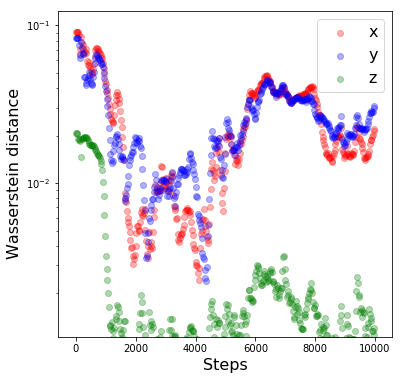

In [32]:
plt.figure(figsize=(6, 6))

plt.scatter(w_dist[:, 0], w_dist[:, 1], color='red', alpha=0.3, label='x')
plt.scatter(w_dist[:, 0], w_dist[:, 2], color='blue', alpha=0.3, label='y')
plt.scatter(w_dist[:, 0], w_dist[:, 3], color='green', alpha=0.3, label='z')

plt.xlabel("Steps", size=16)
plt.ylabel("Wasserstein distance", size=16)
plt.legend(prop={'size': 16})
plt.yscale('log')

(0.001, 0.05)

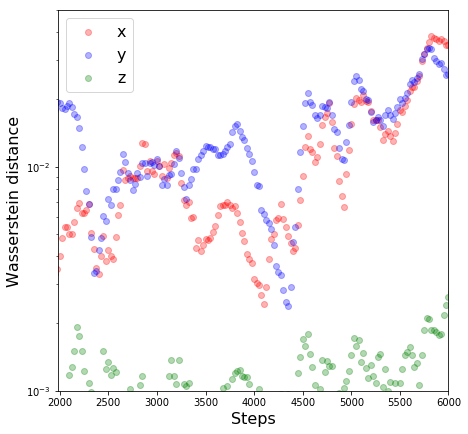

In [35]:
plt.figure(figsize=(7, 7))

plt.scatter(w_dist[:, 0], w_dist[:, 1], color='red', alpha=0.3, label='x')
plt.scatter(w_dist[:, 0], w_dist[:, 2], color='blue', alpha=0.3, label='y')
plt.scatter(w_dist[:, 0], w_dist[:, 3], color='green', alpha=0.3, label='z')

plt.xlabel("Steps", size=16)
plt.ylabel("Wasserstein distance", size=16)
plt.legend(prop={'size': 16})
plt.yscale('log')

plt.xlim(1980, 6000)
plt.ylim(0.001, 0.05)